# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt 

# Load the Preprocessed Data

In [2]:
df = pd.read_csv('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/data/cancer/preprocessed_data.csv')


# Creating Features and Label

In [3]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']


# Splitting Data into Training and Test Set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


#  Scaling Data

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# SVM Model Training

In [6]:
svc = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

# Best Parameters

In [7]:
print(grid_search.best_params_)


{'C': 10, 'gamma': 0.01}


# Fitting the Model with Best Parameters

In [8]:
svc = SVC(C = 10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)


SVC(C=10, gamma=0.01, probability=True)

# Model Predictions

In [9]:
y_pred = svc.predict(X_test)


# Accuracy Score

In [10]:
print(accuracy_score(y_test, y_pred))


0.9766081871345029


# Confusion Matrix


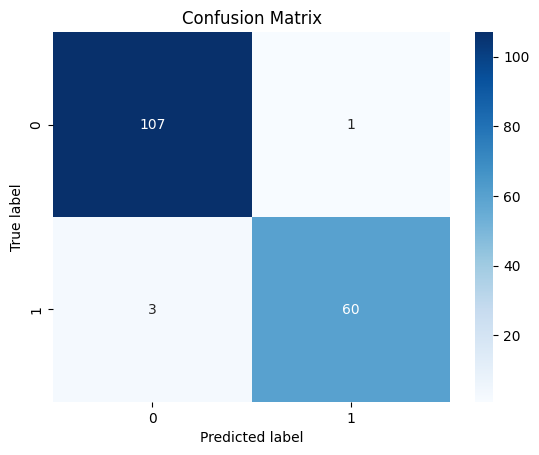

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test are your true labels and y_pred are your predicted labels
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# ROC Curve

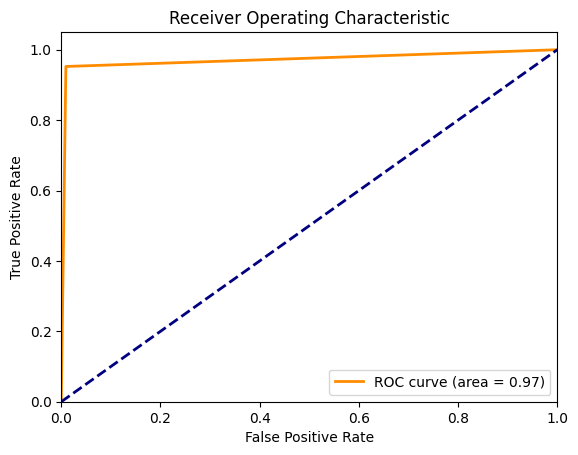

In [12]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test are your true labels and y_pred are your predicted labels
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Classification Report

In [13]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [14]:
import pickle

# Save the model to a file
with open('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/cancer/svm_model.pkl', 'wb') as file:
    pickle.dump(svc, file)


In [15]:
# Load the model from a file
with open('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/cancer/svm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
